In [1]:
import sys
import os
path_to_add = os.getcwd()+"/../filter_masks"
sys.path.append(path_to_add)
from pylab import *
import h5py
from scipy.optimize import curve_fit
#from scipy.stats import binned_statistic_dd
from scipy.stats import binned_statistic_dd
import filter_masks
import pickle
from scipy import stats
from scipy.stats.mstats import theilslopes
from scipy.signal import medfilt
from cycler import cycler
from scipy.signal import savgol_filter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import interactive
import scipy.ndimage

In [2]:
#default plot setting
mpl.rcParams['axes.prop_cycle'] = cycler(color='bgcmyk')
mpl.rcParams['figure.figsize'] = (8,8)
plt.rcParams['image.cmap'] = 'magma'
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.serif'] = 'Computer Modern Roman'
#mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['font.size'] = 18
mpl.rcParams['legend.fontsize'] = 10

In [3]:
def gaussian(x, x0,sigma,a):
        
    #return a*exp(-(x-x0)**2/(2*sigma**2))+4e-2
    return a*exp(-(x-x0)**2/(2*sigma**2))

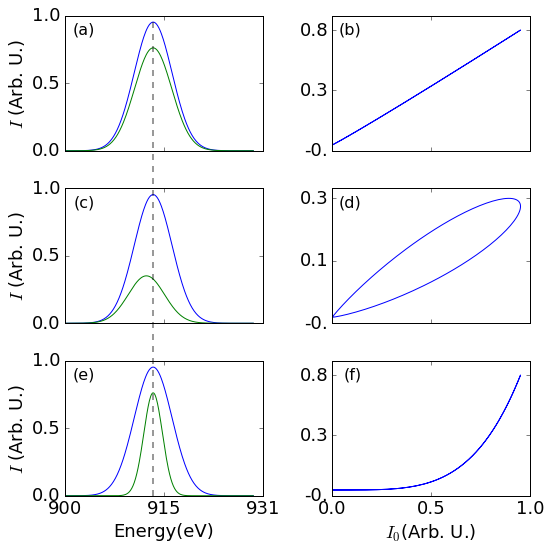

In [17]:
f, axarr = plt.subplots(3,2)
my_gauss_parameters = {'broad_sample':array([914.0,15.0]),'narrow_sample':array([914.0,1.7]),'offset_sample':array([901.0,10.0])}
x = arange(900,930,0.1)
I_GMD = gaussian(x,914.0,3.0,1.0)

panel_label = ["(a)","(b)","(c)","(d)","(e)","(f)"]

weird_reindex = [0,2,1]

for i in arange(3):

    #print(k+", "+str(i))
    k = list(my_gauss_parameters.keys())[weird_reindex[i]]
    
    I_APD = 0.8*I_GMD*gaussian(x,my_gauss_parameters[k][0],my_gauss_parameters[k][1],1.0)
    #I_APD = I_GMD*(1-(arange(900,930,0.1)-914.0)/10.0)
    
    new_x_ticks = arange(0*max(I_GMD)*0.05,max(I_GMD)*3.0/2,1.05*max(I_GMD)/2.0)
    new_y_ticks = arange(0-max(I_APD)*0.05,max(I_APD)*3.0/2,1.05*max(I_APD)/2.0)
    new_e_ticks = arange(min(x),min(x)+(max(x)-min(x))*3.0/2,1.05*(max(x)-min(x))/2.0)
    
    left_panels = axarr[i,0]
    right_panels = axarr[i,1]
    
    left_panels.plot(x,I_GMD)
    left_panels.plot(x,I_APD)
    left_panels.set_ylim(0,max(I_GMD))
    left_panels.set_ylabel("$I$ (Arb. U.)")
    #axarr_twin=left_panels.twinx()
    #axarr_twin.plot(x,I_APD,'g-')
    #axarr_twin.set_xlim(906,924)
    #axarr_twin.set_ylim(0,max(I_APD))
    #axarr_twin.set_ylabel("I(Arb. U.)")
    left_panels.set_yticks(new_x_ticks)
    left_panels.set_yticklabels([str(j)[:3] for j in new_x_ticks])
    
    left_panels.set_xticks(new_e_ticks)
    left_panels.set_xticklabels([])
    
    
    right_panels.plot(I_GMD,I_APD)
    right_panels.set_xlim(0.0,1.0)
    
    #right_panels.set_ylabel("$I$(Arb. U.)")
    
    right_panels.set_xlim(max(I_GMD)*0.05,max(I_GMD))
   
    right_panels.set_xticks(new_x_ticks)
    right_panels.set_xticklabels([])
    
    
    right_panels.set_yticks(new_y_ticks)
    right_panels.set_yticklabels([str(j)[:3] for j in new_y_ticks])
    #left_panels.set_title(k)
    
    axarr[i,0].text(0.15, 0.95, panel_label[2*i], transform=axarr[i,0].transAxes,fontsize=16, fontweight='normal', va='top', ha='right')
    axarr[i,1].text(0.15, 0.95, panel_label[2*i+1], transform=axarr[i,1].transAxes,fontsize=16, fontweight='normal', va='top', ha='right')

left_panels.set_xlabel("Energy(eV)")
left_panels.set_xticks(new_e_ticks)
left_panels.set_xticklabels([str(j)[:3] for j in new_e_ticks])
left_panels.axvline(x=914,color='k',linewidth=2,ymin=0,ymax=3.55,clip_on=False,alpha=0.4,linestyle='dashed')

right_panels.set_xlim(max(I_GMD)*0.05,max(I_GMD))
right_panels.set_xticks(new_x_ticks)
right_panels.set_xticklabels([str(j)[:3] for j in new_x_ticks])

right_panels.set_xlabel("$I_{0}$(Arb. U.)")


tight_layout()
show()



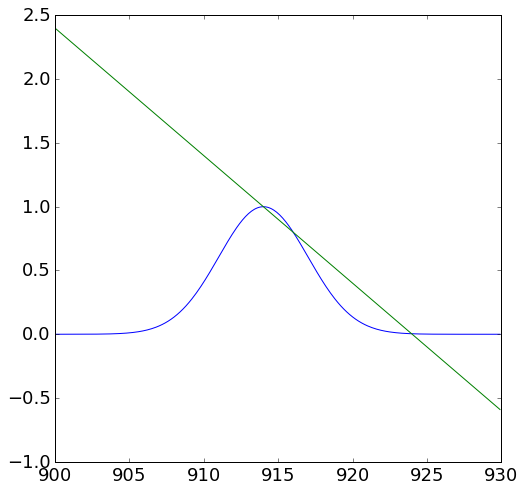

In [146]:
plot(x,I_GMD)
e_line = (1-(arange(900,930,0.1)-914.0)/10.0)
plot(x,e_line)
show()

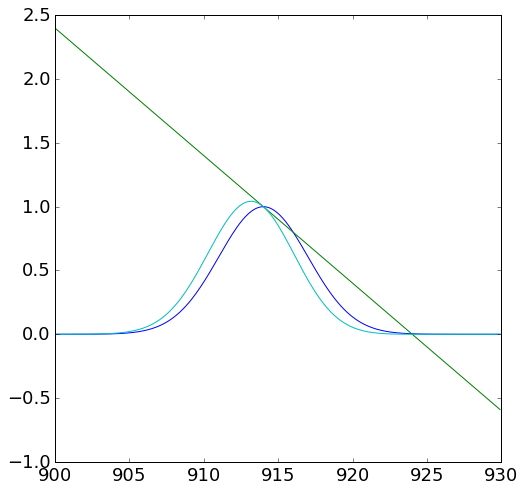

In [150]:
plot(x,I_GMD)
e_line = (1-(arange(900,930,0.1)-914.0)/10.0)
plot(x,e_line)

plot(x,e_line*I_GMD)
show()